# Binary Tempotron
An implementation of the binary tempotron in Julia. 
For further details see [Gütig, R., & Sompolinsky, H. (2006). The tempotron: a neuron that learns spike timing–based decisions. Nature neuroscience, 9(3), 420.](https://www.nature.com/articles/nn1643).

## Imports

In [1]:
using Tempotrons
using Tempotrons.InputGen
using Tempotrons.Plots
using Tempotrons.Optimizers
using Plots;

## Set parameters

In [18]:
N = 10
T = 500
dt = 0.1
t = collect(0:dt:T)
λ = 0.01
opt = SGD(λ)
ν = 3
n_samples = 10
n_steps = 5000
tmp = Tempotron(N = N);

## Generate input samples

In [19]:
base_samples = [[PoissonSpikeTrain(ν = ν, T = T)
                 for i = 1:N]
                for j = 1:2]
samples = [(x = [SpikeJitter(s, T = T, σ = 5)
                 for s ∈ base_samples[2(j-1)÷n_samples + 1]],
            y = Bool(2(j-1)÷n_samples))
           for j = 1:n_samples];

## Training

In [20]:
# Get the tempotron's output before training
out_b = [tmp(s.x, t = t)[2] for s ∈ samples]

# Train the tempotron
@time for i = 1:n_steps
    s = rand(samples)
    Train!(tmp, s.x, s.y, optimizer = opt)
end

# Get the tempotron's output after training
out_a = [tmp(s.x, t = t)[2] for s ∈ samples];

  0.094857 seconds (2.54 M allocations: 53.510 MiB, 12.15% gc time)


## Plots

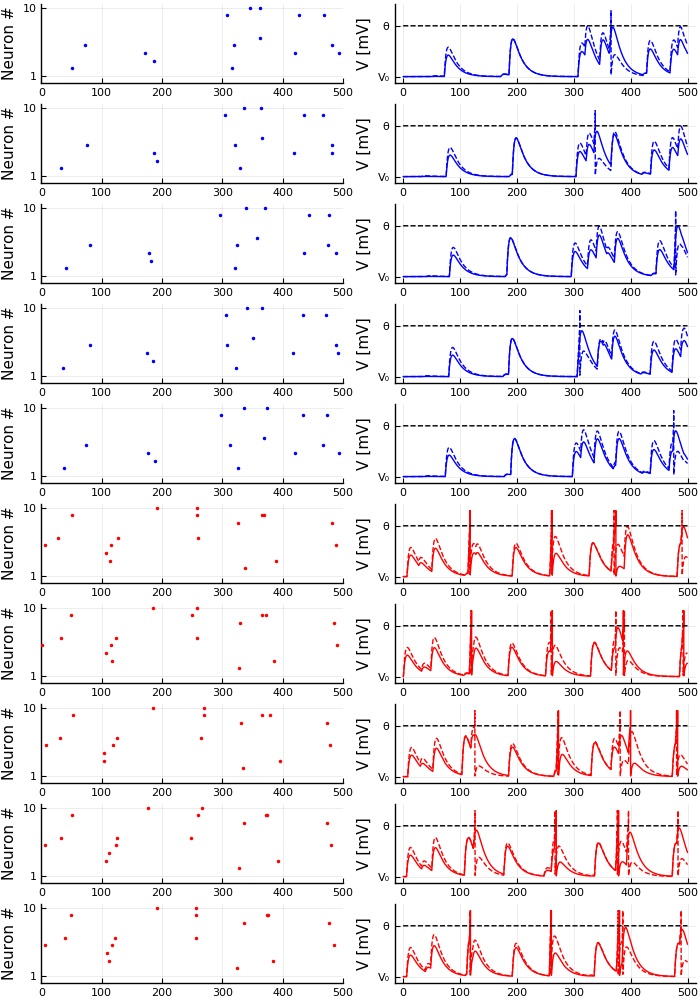

In [21]:
pyplot(size = (700, 1000))
inp_plots = [PlotInputs(s.x, T_max = T, color = (s.y ? :red : :blue))
             for s ∈ samples]
train_plots = [PlotPotential(tmp, out_b = out_b[i], out_a = out_a[i],
                             t = t, color = (samples[i].y ? :red : :blue))
               for i = 1:length(samples)]
ps = vcat(reshape(inp_plots, 1, :), reshape(train_plots, 1, :))
plot(ps[:]..., layout = (length(inp_plots), 2))